# Confidence intervals case study using NHANES data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

In [2]:
df = pd.read_csv("C:\\Users\\Ravi Nadageri\\Documents\\Github_projects\\Coursera\\Projects\\nhanes_2015_2016.csv")

In [3]:
df.head(5)

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [4]:
df.shape

(5735, 28)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5735 entries, 0 to 5734
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      5735 non-null   int64  
 1   ALQ101    5208 non-null   float64
 2   ALQ110    1731 non-null   float64
 3   ALQ130    3379 non-null   float64
 4   SMQ020    5735 non-null   int64  
 5   RIAGENDR  5735 non-null   int64  
 6   RIDAGEYR  5735 non-null   int64  
 7   RIDRETH1  5735 non-null   int64  
 8   DMDCITZN  5734 non-null   float64
 9   DMDEDUC2  5474 non-null   float64
 10  DMDMARTL  5474 non-null   float64
 11  DMDHHSIZ  5735 non-null   int64  
 12  WTINT2YR  5735 non-null   float64
 13  SDMVPSU   5735 non-null   int64  
 14  SDMVSTRA  5735 non-null   int64  
 15  INDFMPIR  5134 non-null   float64
 16  BPXSY1    5401 non-null   float64
 17  BPXDI1    5401 non-null   float64
 18  BPXSY2    5535 non-null   float64
 19  BPXDI2    5535 non-null   float64
 20  BMXWT     5666 non-null   floa

In [6]:
da = df
da["SMQ020x"] = da.SMQ020.replace({1: "Yes", 2: "No", 7: np.nan, 9: np.nan})  # np.nan represents a missing value
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})

We can now tabulate the numbers of female and male smokers and non-smokers:

In [7]:
dx = da[["SMQ020x", "RIAGENDRx"]].dropna()  # dropna drops cases where either variable is missing
pd.crosstab(dx.SMQ020x, dx.RIAGENDRx)

RIAGENDRx,Female,Male
SMQ020x,,
No,2066,1340
Yes,906,1413


The confidence interval (CI) is constructed using two inputs: the sample proportion of smokers, and the total sample size for smokers and non-smokers combined. We calculate these values next.

In [8]:
dz = dx.groupby(dx.RIAGENDRx).agg({"SMQ020x": [lambda x: np.mean(x=="Yes"), np.size]})
dz.columns = ["Proportion", "Total_n"] # The default column names are unclear, so we replace them here
dz

,Proportion,Total_n
RIAGENDRx,,
Female,0.304845,2972
Male,0.513258,2753


Confidence intervals are closely connected to standard errors. Recall that the standard error essentially tells you how far you should expect an estimate to fall from the truth. A confidence interval is an interval that under repeated sampling covers the truth a defined proportion of the time. In most settings, this "coverage probability" is set to 95%.

It turns out that in many settings, a 95% confidence interval can be constructed as the interval consisting of all points that are within two (or 1.96) standard errors of the point estimate. More concisely, the confidence interval approximately spans from e - 2•SE to e + 2•SE, where e is the point estimate and SE is the standard error.

Since the standard error plays such an important role here, we calculate it separately first.

In [9]:
p = dz.Proportion.Female # Female proportion
n = dz.Total_n.Female # Total number of females
se_female = np.sqrt(p * (1 - p) / n)
print(se_female)

p = dz.Proportion.Male # Male proportion
n = dz["Total_n"].Male # Total number of males
se_male = np.sqrt(p * (1 - p) / n)
print(se_male)

0.008444152146214435
0.009526078653689868


The results above indicate that any population proportion (for female lifetime smokers) between 0.288 and 0.321 would be compatible with the data that we observed in NHANES.

In [10]:
p = dz.Proportion.Female # Female proportion
n = dz.Total_n.Female # Total number of females
lcb = p - 1.96 * np.sqrt(p * (1 - p) / n)  
ucb = p + 1.96 * np.sqrt(p * (1 - p) / n)  
print(lcb, ucb)

0.288294683866098 0.32139576027925865


These results indicate that any population proportion (for male lifetime smokers) between 0.493 and 0.531 would be compatible with the NHANES data.

In a routine data analysis, we do not need to calculate these intervals manually. We can use the Statsmodels library to calculate the CI for us in one line:

In [11]:
p = dz.Proportion.Male # Male proportion
n = dz.Total_n.Male # Total number of males
lcb = p - 1.96 * np.sqrt(p * (1 - p) / n)  
ucb = p + 1.96 * np.sqrt(p * (1 - p) / n)  
print(lcb, ucb)

0.49458714955108174 0.531929377873546


In [12]:
# 95% CI for the proportion of females who smoke (compare to value above)
sm.stats.proportion_confint(906, 906+2066) 

(0.2882949879861214, 0.32139545615923526)

In [13]:
# 95% CI for the proportion of males who smoke (compare to value above)
sm.stats.proportion_confint(1413, 1413+1340)  

(0.49458749263718593, 0.5319290347874418)

Confidence intervals comparing two independent proportions

In [14]:
se_diff = np.sqrt(se_female**2 + se_male**2)
se_diff

0.012729881381407434

In [15]:
d = dz.Proportion.Female - dz.Proportion.Male
lcb = d - 2*se_diff
ucb = d + 2*se_diff
print(lcb, ucb)

-0.2338728044024504 -0.18295327887682067


Confidence intervals for subpopulations

c:\Users\Ravi Nadageri\Python_3_10\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Ravi Nadageri\Python_3_10\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Ravi Nadageri\Python_3_10\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warning

Text(0, 0.5, 'Female - male smoking proportion')

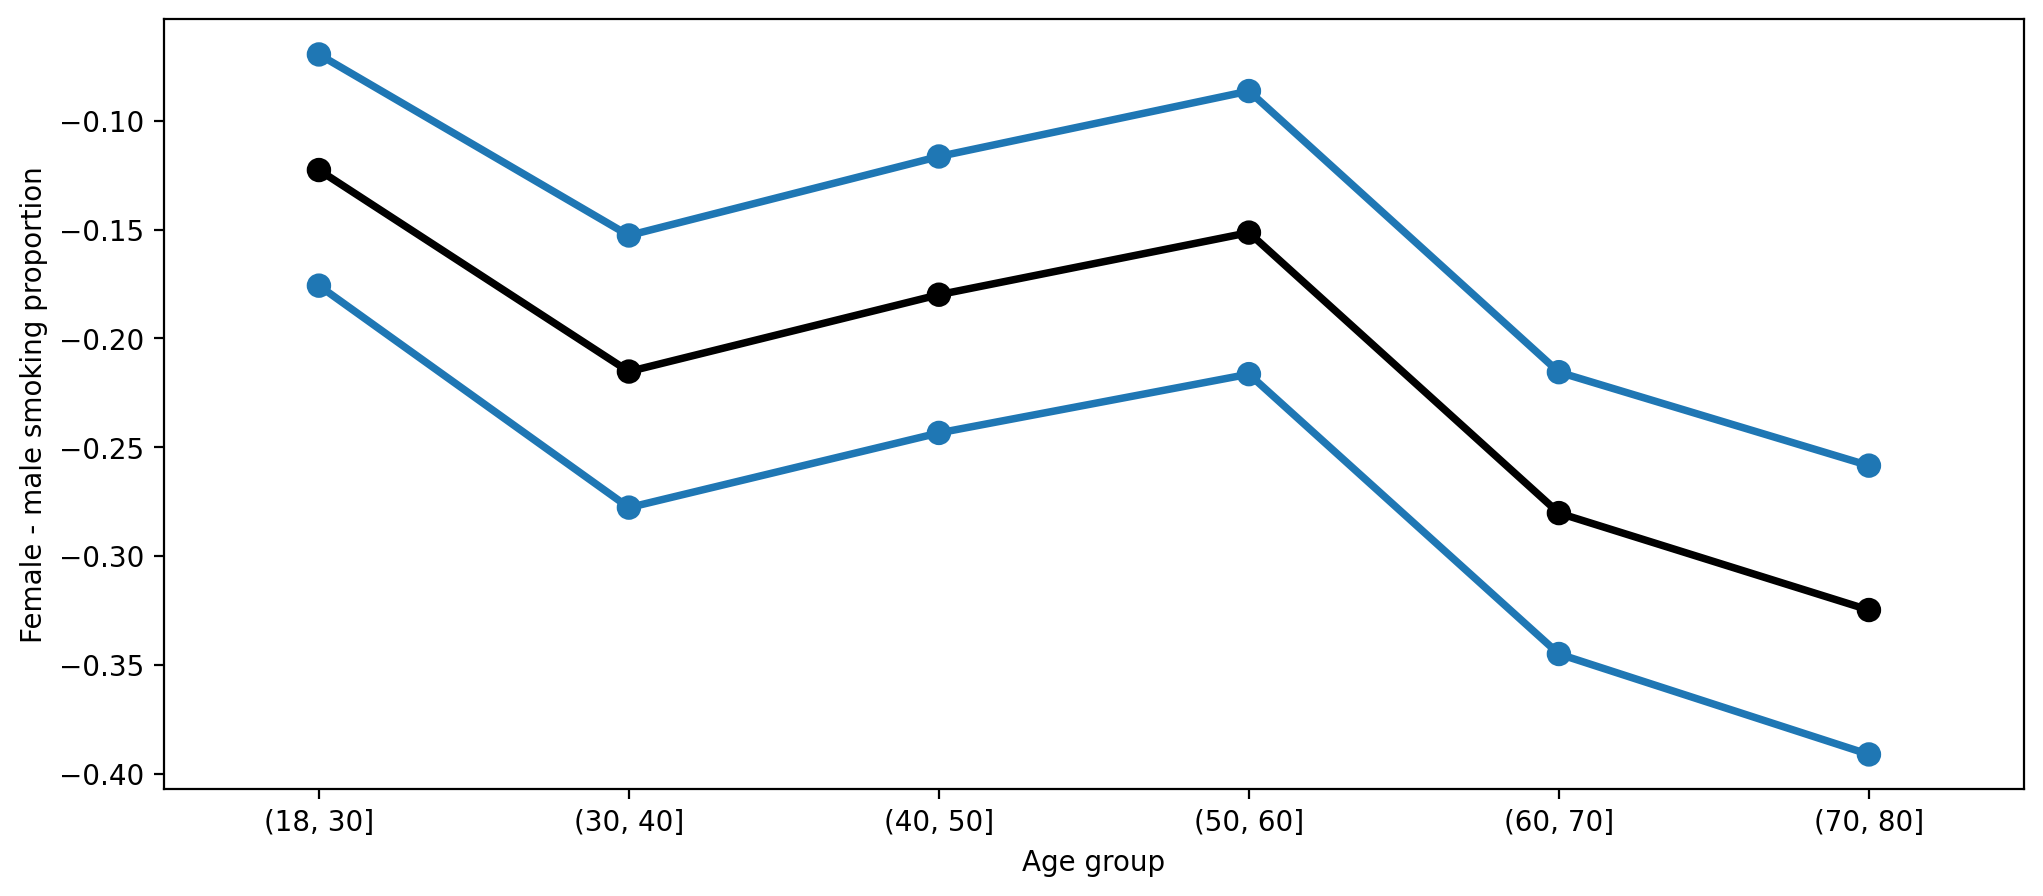

In [16]:
# Calculate the smoking rates within age/gender groups
da["agegrp"] = pd.cut(da.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])
pr = da.groupby(["agegrp", "RIAGENDRx"]).agg({"SMQ020x": lambda x: np.mean(x=="Yes")}).unstack()
pr.columns = ["Female", "Male"]

# The number of people for each calculated proportion
dn = da.groupby(["agegrp", "RIAGENDRx"]).agg({"SMQ020x": np.size}).unstack()
dn.columns = ["Female", "Male"]

# Standard errors for each proportion
se = np.sqrt(pr * (1 - pr) / dn)

# Standard error for the difference in female/male smoking rates in every age band
se_diff = np.sqrt(se.Female**2 + se.Male**2)

# Standard errors for the difference in smoking rates between genders, within age bands

# The difference in smoking rates between genders
pq = pr.Female - pr.Male
plt.figure(figsize=(12,5),dpi=200)
x = np.arange(pq.size)
pp = sns.pointplot(x, pq.values, color='black')
sns.pointplot(x, pq - 2*se_diff)
sns.pointplot(x, pq + 2*se_diff)
pp.set_xticklabels(pq.index)
pp.set_xlabel("Age group")
pp.set_ylabel("Female - male smoking proportion")

Confidence intervals for the mean

In [17]:
da.groupby("RIAGENDRx").agg({"BMXBMI": np.mean})

,BMXBMI
RIAGENDRx,
Female,29.939946
Male,28.778072


In [18]:
sem_female = 7.753 / np.sqrt(2976)
sem_male = 6.253 / np.sqrt(2759)
print(sem_female, sem_male)

0.14211938534506902 0.119045388988243


We can now calculate the standard error of the mean BMI for women and for men:

In [19]:
lcb_female = 29.94 - 1.96 * 7.753 / np.sqrt(2976)
ucb_female = 29.94 + 1.96 * 7.753 / np.sqrt(2976)
print(lcb_female, ucb_female)

29.661446004723665 30.218553995276338


In [20]:
female_bmi = da.loc[da.RIAGENDRx=="Female", "BMXBMI"].dropna()
sm.stats.DescrStatsW(female_bmi).zconfint_mean()

(29.659875498090155, 30.22001580625768)

Confidence intervals for the difference between two means

In [21]:
sem_diff = np.sqrt(sem_female**2 + sem_male**2)
sem_diff

0.18539073420811059

In [22]:
bmi_diff = 29.94 - 28.78
lcb = bmi_diff - 2*sem_diff
ucb = bmi_diff + 2*sem_diff
(lcb, ucb)

(0.789218531583779, 1.5307814684162213)

c:\Users\Ravi Nadageri\Python_3_10\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Ravi Nadageri\Python_3_10\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Ravi Nadageri\Python_3_10\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warning

Text(0, 0.5, 'Female - male BMI difference')

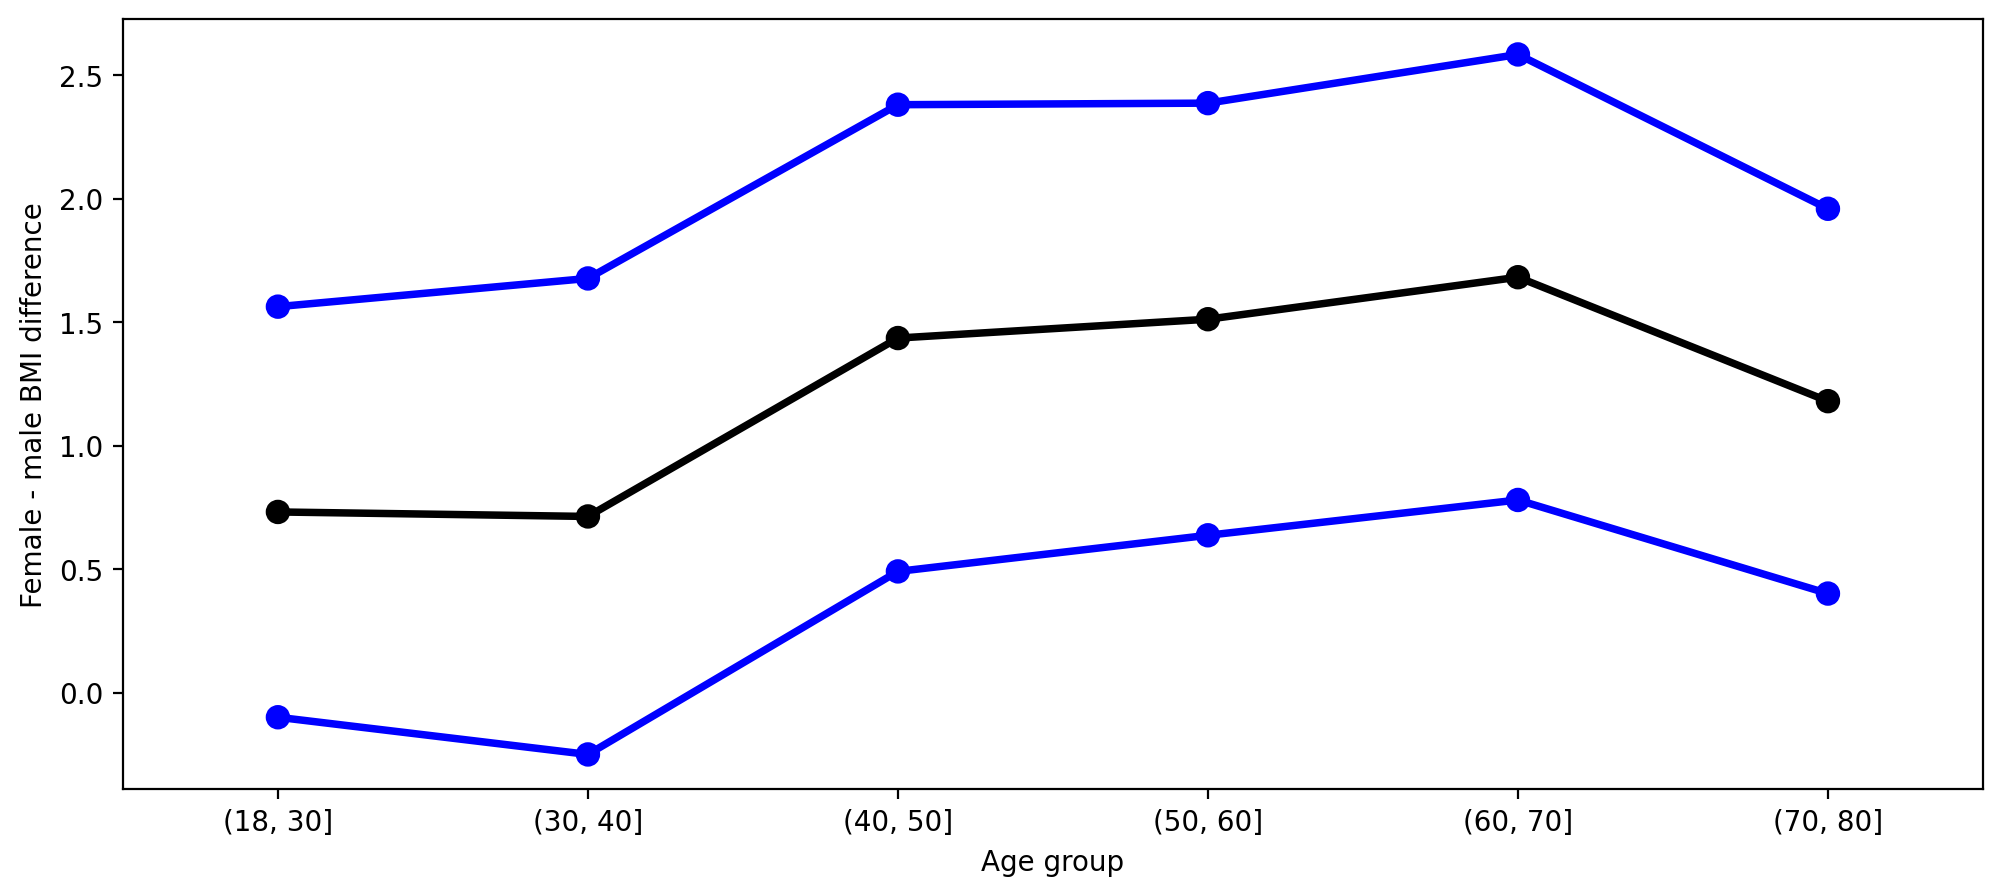

In [23]:
plt.figure(figsize=(12,5),dpi=200)
# Calculate the mean, SD, and sample size for BMI within age/gender groups
da["agegrp"] = pd.cut(da.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])
pr = da.groupby(["agegrp", "RIAGENDRx"]).agg({"BMXBMI": [np.mean, np.std, np.size]}).unstack()

# Calculate the SEM for females and for males within each age band
pr["BMXBMI", "sem", "Female"] = pr["BMXBMI", "std", "Female"] / np.sqrt(pr["BMXBMI", "size", "Female"]) 
pr["BMXBMI", "sem", "Male"] = pr["BMXBMI", "std", "Male"] / np.sqrt(pr["BMXBMI", "size", "Male"]) 

# Calculate the mean difference of BMI between females and males within each age band, also  calculate
# its SE and the lower and upper limits of its 95% CI.
pr["BMXBMI", "mean_diff", ""] = pr["BMXBMI", "mean", "Female"] - pr["BMXBMI", "mean", "Male"]
pr["BMXBMI", "sem_diff", ""] = np.sqrt(pr["BMXBMI", "sem", "Female"]**2 + pr["BMXBMI", "sem", "Male"]**2) 
pr["BMXBMI", "lcb_diff", ""] = pr["BMXBMI", "mean_diff", ""] - 1.96 * pr["BMXBMI", "sem_diff", ""] 
pr["BMXBMI", "ucb_diff", ""] = pr["BMXBMI", "mean_diff", ""] + 1.96 * pr["BMXBMI", "sem_diff", ""] 

# Plot the mean difference in black and the confidence limits in blue
x = np.arange(pr.shape[0])
pp = sns.pointplot(x, pr["BMXBMI", "mean_diff", ""], color='black')
sns.pointplot(x, pr["BMXBMI", "lcb_diff", ""], color='blue')
sns.pointplot(x, pr["BMXBMI", "ucb_diff", ""], color='blue')
pp.set_xticklabels(pr.index)
pp.set_xlabel("Age group")
pp.set_ylabel("Female - male BMI difference")

Inter-group and intra-group differences:

In [24]:

print(pr)

              BMXBMI                                                       \
                mean                  std             size            sem   
RIAGENDRx     Female       Male    Female      Male Female Male    Female   
agegrp                                                                      
(18, 30]   28.123881  27.391822  7.745893  6.649440    609  544  0.313879   
(30, 40]   30.325586  29.611726  8.315608  6.622412    474  458  0.381949   
(40, 50]   31.160643  29.724623  8.076195  6.407076    502  401  0.360458   
(50, 60]   30.743777  29.231486  7.575848  5.914373    470  454  0.349448   
(60, 70]   31.074828  29.392488  7.604514  5.933307    441  437  0.362120   
(70, 80]   29.138213  27.957692  6.284968  4.974855    410  402  0.310392   

                                                             
                    mean_diff  sem_diff  lcb_diff  ucb_diff  
RIAGENDRx      Male                                          
agegrp                                     

Confidence intervals and sample size

In [25]:
dx = da.loc[da.RIAGENDRx=="Female", ["RIAGENDRx", "BMXBMI"]].dropna()

all_cis = []
for n in 100, 200, 400, 800:
    cis = []
    for i in range(500):
        dz = dx.sample(n)
        ci = sm.stats.DescrStatsW(dz.BMXBMI).zconfint_mean()
        cis.append(ci)
    cis = np.asarray(cis)
    mean_width = cis[:, 1].mean() - cis[:, 0].mean()
    print(n, mean_width)
    all_cis.append(cis)

100 3.009405302703474
200 2.1379727882361372
400 1.5185871467025969
800 1.0743794200454317


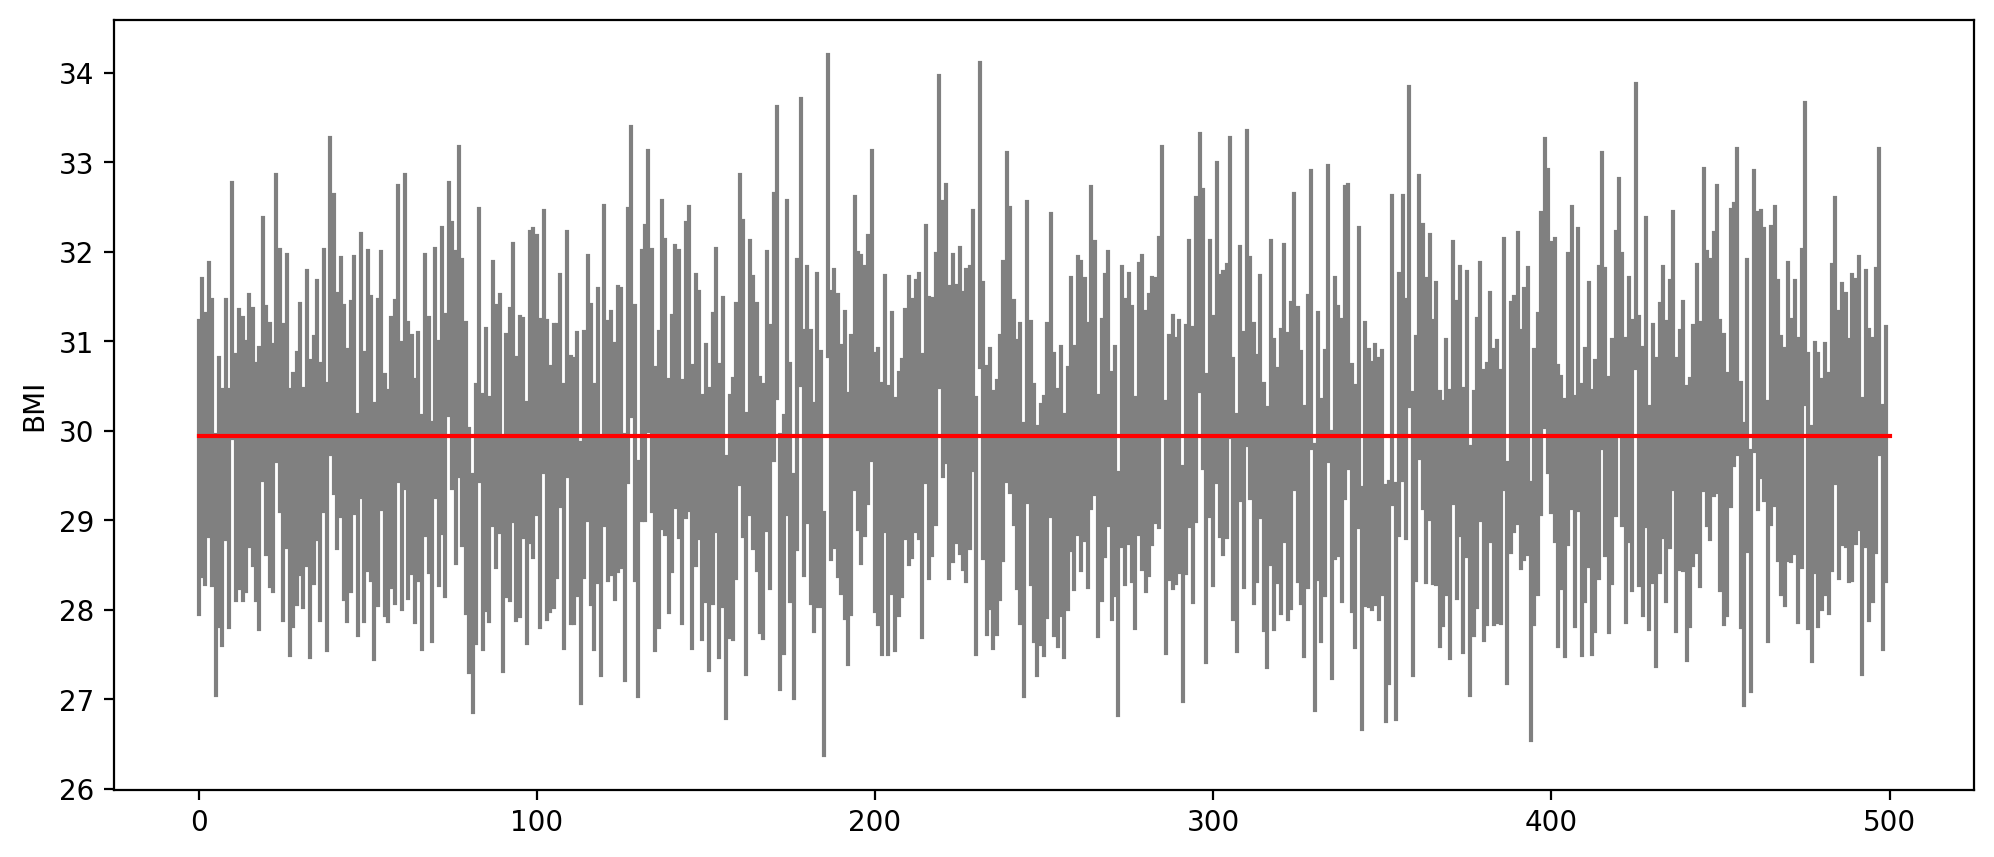

In [26]:
plt.figure(figsize=(12,5),dpi=200)
ci = all_cis[0]
for j, x in enumerate(ci):
    plt.plot([j, j], x, color='grey')
    plt.gca().set_ylabel("BMI")
mn = dx.BMXBMI.mean()
plt.plot([0, 500], [mn, mn], color='red')

We can calculate the fraction of the 500 simulated confidence intervals that did not cover the target value. This is called the "non-coverage probability". There are two ways for an interval to fail to cover the target -- either the upper limit of the interval can fall below the target, or the lower limit of the interval can fall above the target. We calculate each of these below. The sum of these two probabilities should be around 0.05, which is the allowed proportion of the time that a 95% confidence interval does not cover its target

In [27]:
print(np.mean(ci[:, 1] < mn)) # Upper limit falls below the target
print(np.mean(ci[:, 0] > mn)) # Lower limit falls above the target

0.038
0.03
